In [1]:
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

# Caracterización de Sistemas en el Dominio del Tiempo



## Ejemplo RLC serie

Considere el circuito que se muestra en la figura. Suponga que la entrada es el voltaje $x(t)$ y la salida el voltaje $y(t)$. Suponga además que no hay energía almacenada en los elementos que almacenan energía en $t<0$. Además, considere que $x(t)=0 \forall t<0$.

![Circuito](figuras/lowpass.png)

Para ilustrar, considere que $L = 0.5$, $R = 1$, $C = 0.4$ .

### Ecuación diferencial (modelo)

Aplicando las [Leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws) al circuito se obtiene la siguiente ODE.

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

Defínala en `SymPy`

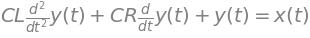

In [2]:
t, L, R, C = sym.symbols('t L R C', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*C*y.diff(t, 2) + R*C*y.diff(t) + y, x)
ode


Introduzca los valores de los elementos del circuito en un diccionario para usarlo después.

In [3]:
RLC = {R: 1.1,
       L: 0.5,
       C: 2}
RLC

### Respuesta impulsional

Encuentre la respuesta impulsional del circuito resolviendo la ODE para $x(t)=\delta(t)$

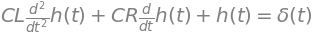

In [4]:
ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t))

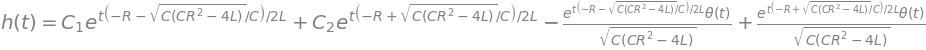

In [5]:
solution_h = sym.dsolve(
    ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

Las constantes $C_1$ y $C_2$ deben calcularse para satisfacer las condiciones iniciales  $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ para $t<0$. 

In [6]:
integration_constants = sym.solve(
    (solution_h.rhs.limit(t, 0, '-'),
     solution_h.rhs.diff(t).limit(t, 0, '-')),
    ['C1', 'C2'])
integration_constants

Remplace los valores de las constantes de integración $C_1$ y $C_2$ en la solución de la ODE obtenida antes para encontrar la respuesta impulsional completa.

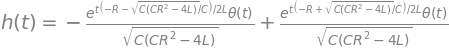

In [7]:
h = solution_h.subs(integration_constants)
h

Grafique la respuesta impulsional del sistema usando los parámetros almacenados en el diccionario RLC.

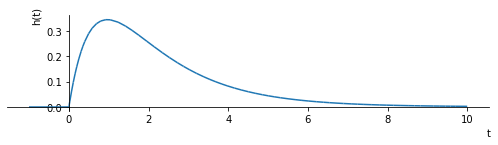

In [8]:
plt.rcParams['figure.figsize'] = 7, 2
sym.plot(h.rhs.subs(RLC), (t,-1,10), ylabel=r'h(t)');

### Respuesta al escalón

La respuesta al escalón se obtiene al integrar la respuesta impulsional.

In [9]:
tau = sym.symbols('tau', real=True)

he = sym.integrate(h.rhs.subs(t, tau), (tau, 0, t))
he

                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
  ⎛⎧⎧                                       _______________                   
  ⎜⎪⎪        -2⋅C⋅L                        ╱  2  2                            
  ⎜⎪⎪────────────────────────  for C⋅R - ╲╱  C ⋅R  - 4⋅C⋅L  ≠ 0               
  ⎜⎪⎪         _______________                                                ╱
  ⎜⎪⎨        ╱  2  2                                             for C⋅R - ╲╱ 
  ⎜⎪⎪C⋅R - ╲╱  C ⋅R  - 4⋅C⋅L                                                  
  ⎜⎪⎪                                                                         
- ⎜⎨⎪           0                         otherwise 

Para facilitar la interpretación de la expresión, considere los valores almacenados en el diccionario.

In [10]:
tau = sym.symbols('tau', real=True)

he = sym.integrate(h.rhs.subs(RLC).subs(t, tau), (tau, 0, t)).simplify()
he

Grafique la respuesta al escalón.

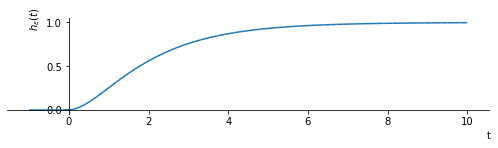

In [11]:
sym.plot(he, (t,-1,10), ylabel=r'$h_\epsilon(t)$');